In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv("cpcb_dly_aq_maharashtra-2015.csv")

In [82]:
df.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,165,02-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,16.0,16.0,187.0,NaN
1,165,09-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,23.0,21.0,191.0,NaN
2,165,12-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,25.0,5.0,109.0,NaN
3,165,23-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,155.0,82.0,106.0,NaN
4,165,28-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,19.0,12.0,171.0,NaN


#  DATA PREPERATION
## 1] DEALING WITH NULL VALUES

In [83]:
#CHECKING ALL NULL VALUES: 
df.isnull().sum()

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                287
NO2                                 65
RSPM/PM10                           25
PM 2.5                            6994
dtype: int64

In [84]:
# REMOVING PM 2.5 AS IT CONTAIINS ONLY NULL VALUES.
df= df.drop('PM 2.5', axis=1)

In [85]:
#REMOVING REQUIRED ROWS OF COLUMNS SO2, NO2, RSMP/PM10 CONTAINING NULL VALUES
df = df.dropna(axis=0)

In [86]:
df.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10
0,165,02-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,16.0,16.0,187.0
1,165,09-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,23.0,21.0,191.0
2,165,12-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,25.0,5.0,109.0
3,165,23-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,155.0,82.0,106.0
4,165,28-01-15,Maharashtra,Nagpur,"MIDC Industrial Area, MIDC Office, Hingna,Nagpur",National Environmental Engineering Research In...,Industrial Area,19.0,12.0,171.0


In [87]:
df.isnull().sum()    #checking if null values remaining

Stn Code                          0
Sampling Date                     0
State                             0
City/Town/Village/Area            0
Location of Monitoring Station    0
Agency                            0
Type of Location                  0
SO2                               0
NO2                               0
RSPM/PM10                         0
dtype: int64

In [88]:
#no null values.

# 2] DESCRIPTIVE ANALYSIS

In [89]:
df.describe()[['SO2','NO2','RSPM/PM10']]

,SO2,NO2,RSPM/PM10
count,6672.000000,6672.000000,6672.000000
mean,16.090378,34.804706,101.242206
std,13.182065,20.324258,47.883648
min,1.000000,2.000000,3.000000
25%,8.000000,20.000000,67.000000
50%,13.000000,32.000000,97.000000
75%,20.000000,46.000000,128.000000
max,184.000000,167.000000,660.000000


## Inference:

1]SO2: 
 Mean: 16.09 µg/m³,
 Median: 13 µg/m³
-->Majority of observations below 20 µg/m³

2]NO2: 
 Mean: 34.80 µg/m³,
 Median: 32 µg/m³
-->Majority of observations below 46 µg/m³

3]RSPM/PM10:
 Mean: 101.24 µg/m³,
 Median: 97 µg/m³
-->Majority of observations below 128 µg/m³

## Conclusion for descriptive analysis->

i) Mean concentrations of these pollutants indicate moderate levels of air pollution.

ii) Majority of observations fall within relatively lower concentration ranges, as suggested by the medians being slightly lower than the means.

iii) Wide ranges of values and the presence of higher maximum concentrations suggest the presence of potential pollution hotspots or episodes of elevated pollution levels.

### Further analysis, including temporal and spatial trends exploration, as well as comparison with air quality standards and guidelines, is necessary to assess the overall air quality status and potential implications for public health and environmental management.

# 3] Temporal Analysis

Analyzing temporal trends in pollutant levels over different time scales (e.g., hourly, daily,
monthly).

In [90]:
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'])

In [91]:
df.set_index('Sampling Date', inplace=True)

In [92]:
df_daily = df.resample('D').mean()

C:\Users\harsh\AppData\Local\Temp\ipykernel_21216\1972200013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').mean()


## Yearly

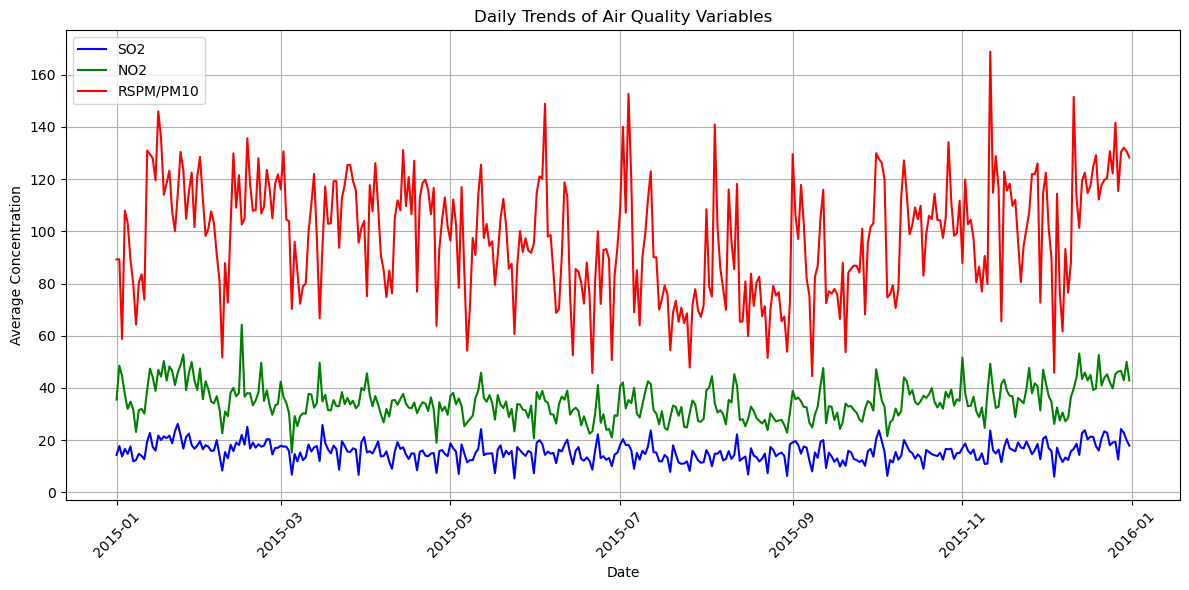

In [93]:
plt.figure(figsize=(12, 6))

#for s02:
plt.plot(df_daily.index, df_daily['SO2'], label='SO2', color='blue')
#for no2:
plt.plot(df_daily.index, df_daily['NO2'], label='NO2', color='green')
#for rspm/pm10:
plt.plot(df_daily.index, df_daily['RSPM/PM10'], label='RSPM/PM10', color='red')

plt.title('Daily Trends of Air Quality Variables')
plt.xlabel('Date')
plt.ylabel('Average Concentration')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## By weekday

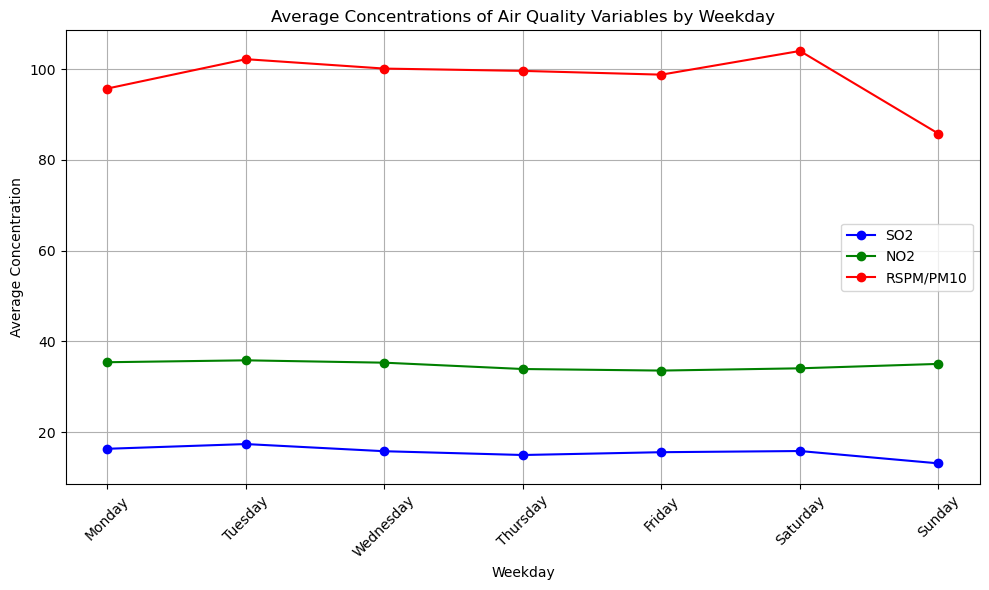

In [94]:
df_daily['Weekday'] = df_daily.index.day_name()
df_weekday = df_daily.groupby('Weekday').mean()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = df_weekday.reindex(weekday_order)


plt.figure(figsize=(10, 6))

plt.plot(df_weekday.index, df_weekday['SO2'], label='SO2', color='blue', marker='o')
plt.plot(df_weekday.index, df_weekday['NO2'], label='NO2', color='green', marker='o')
plt.plot(df_weekday.index, df_weekday['RSPM/PM10'], label='RSPM/PM10', color='red', marker='o')

plt.title('Average Concentrations of Air Quality Variables by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Concentration')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Inference:

### For Yearly:

As expected, Respiratory Suspended Particulate Matter (RSPM) has highest concentration. Followed by Nitrogen Dioxide (NO2) and Sulphur Dioxide (SO2).

-RSMP Concentration seems to achieve maximum concentration of 160+ micrograms in mid november and minimum of 43 micrograms in december 2015.

-NO2 Concentration seems to achieve maximum concentration of 65 micrograms and minimum of 17 micrograms both in late february.

-SO2 Concentration seems to achieve maximum concentration of 24 micrograms and minimum of 8 micrograms both in late february.

### For Weekly:

Spike of RSPM observed on weekend.

All particle concentrations constant otherwise.

## Conclusion

#### -> Late february of 2015, high pollutants observed. Possible causes: War in Donbass, Yemeni civil war. (Source: feb 2015 events wikipedia)

#### -> Spikes are observed on festival days, leading to the conclusion that fireworks or lanterns are involved.

# 4] Spatial Analysis

## 1] Top 10 hotspots

In [95]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [99]:
import geopandas as gpd

In [103]:
df_agg = df.groupby('City/Town/Village/Area').mean()
top10 = df_agg.mean(axis=1).nlargest(10)

C:\Users\harsh\AppData\Local\Temp\ipykernel_21216\2804774012.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby('City/Town/Village/Area').mean()


In [97]:
top10

City/Town/Village/Area
Nanded        242.189103
Jalna         216.746988
Akola         210.947761
Badlapur      207.434343
Ulhasnagar    207.263975
Jalgaon       201.909164
Latur         185.122852
Pune          178.092330
Sangli        176.172078
Amravati      170.242886
dtype: float64

C:\Users\harsh\AppData\Local\Temp\ipykernel_21216\1466476780.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby('City/Town/Village/Area').mean()


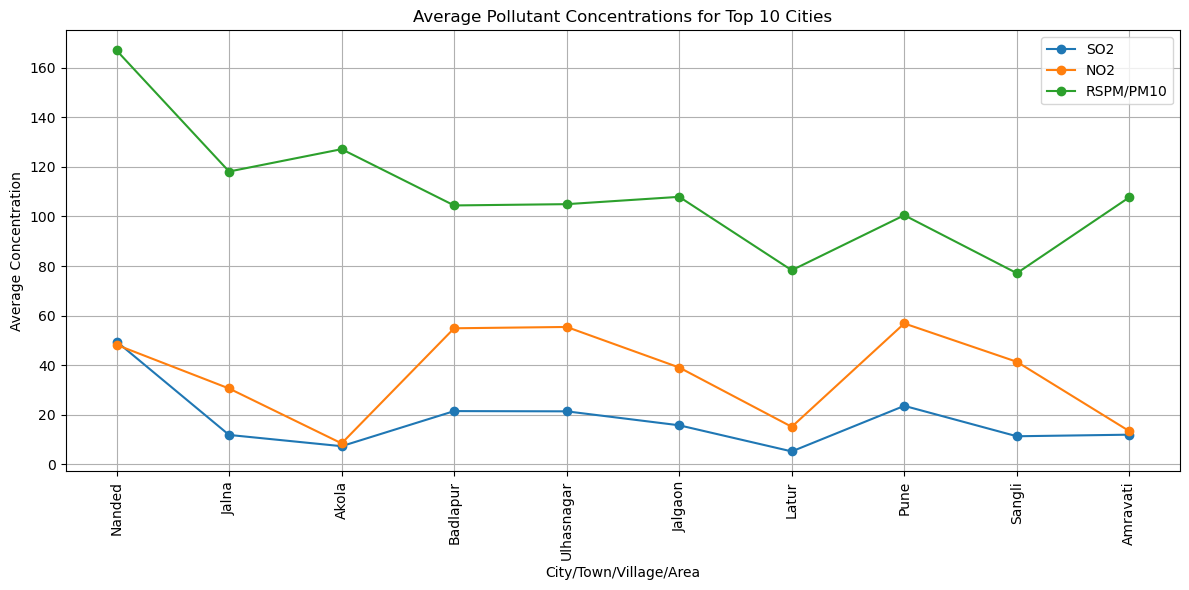

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

df_agg = df.groupby('City/Town/Village/Area').mean()
top_10_cities = df_agg.mean(axis=1).nlargest(10).index
df_top_10 = df_agg.loc[top_10_cities]

plt.figure(figsize=(12, 6))

plt.plot(df_top_10.index, df_top_10['SO2'], label='SO2', marker='o')
plt.plot(df_top_10.index, df_top_10['NO2'], label='NO2', marker='o')
plt.plot(df_top_10.index, df_top_10['RSPM/PM10'], label='RSPM/PM10', marker='o')


plt.title('Average Pollutant Concentrations for Top 10 Cities')
plt.xlabel('City/Town/Village/Area')
plt.ylabel('Average Concentration')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


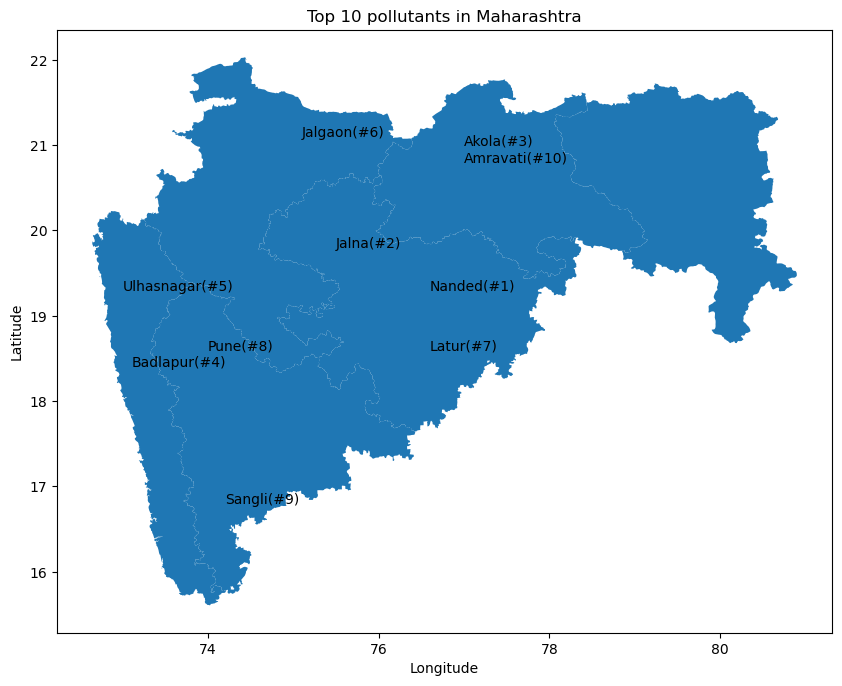

In [151]:
maharashtra_divisions = gpd.read_file('maharashtra_divisions.json')
maharashtra_divisions.plot(figsize=(10, 10))
plt.title('Top 10 pollutants in Maharashtra')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.text(75.5,19.8,'Jalna(#2)')
plt.text(77,21,'Akola(#3)')
plt.text(74,18.6,'Pune(#8)')
plt.text(76.6,19.3,'Nanded(#1)')
plt.text(74.2,16.8,'Sangli(#9)')
plt.text(73,19.3,'Ulhasnagar(#5)')
plt.text(73.1,18.4,'Badlapur(#4)')
plt.text(75.1,21.1,'Jalgaon(#6)')
plt.text(76.6,18.6,'Latur(#7)')
plt.text(77,20.8,'Amravati(#10)')
plt.show()

## Inference

In [ ]:
# Top 10 most polluting cities: 
# Nanded        242.189103
# Jalna         216.746988
# Akola         210.947761
# Badlapur      207.434343
# Ulhasnagar    207.263975
# Jalgaon       201.909164
# Latur         185.122852
# Pune          178.092330
# Sangli        176.172078
# Amravati      170.242886

## Conclusion

### Metropolitan areas are seen to be highly polluting. Probably due to the metropolitan lifestlye.

# 5] Source Apportionment

## Agencies Involved, sorted by rank. (No. of Monitoring stations.) 

In [165]:
agency_counts = df['Agency'].value_counts()

for i, (agency, count) in enumerate(agency_counts.items(), start=1):
    print(f"{i}. {agency}: {count}")

1. Maharashtra State Pollution Control Board: 4969
2. National Environmental Engineering Research Institute: 331
3. Thane Municipal Corporation: 311
4. Visveshwaraya National Institute Of Technology: 310
5. K.R.T.Arts,B.H.Commerce and A.M. Science College: 280
6. University of Pune: 265
7. Walchand Institute of Technology, Solapur: 206


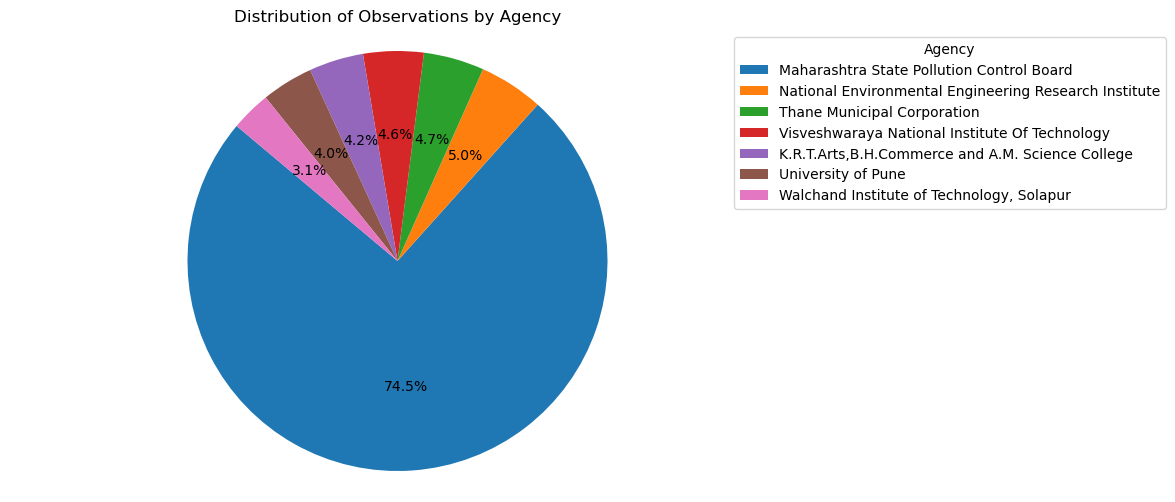

In [172]:
plt.figure(figsize=(10, 6))
plt.pie(agency_counts, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Observations by Agency')
plt.axis('equal')  
plt.legend(agency_counts.index, title='Agency', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Inference

1] Maharashtra State Pollution Control Board has the highest number of observations (4969), indicating its extensive involvement in monitoring air quality in the state.

2] K.R.T.Arts,B.H.Commerce and A.M. Science College, University of Pune, and Walchand Institute of Technology, Solapur have fewer observations compared to the top agencies, indicating their relatively lesser involvement in air quality monitoring or a smaller area of operation.

## Conclusion

#### Multiple agencies, including government bodies, research institutes, and educational institutions, are actively involved in monitoring air quality in Maharashtra. The dominance of the Maharashtra State Pollution Control Board suggests its central role in coordinating and implementing air quality monitoring initiatives across the state.

# 6] Correlation Analysis

In [178]:
correlation_matrix = df[['SO2', 'NO2', 'RSPM/PM10']].corr()
print(correlation_matrix)


                SO2       NO2  RSPM/PM10
SO2        1.000000  0.621241   0.428932
NO2        0.621241  1.000000   0.326857
RSPM/PM10  0.428932  0.326857   1.000000


## Inference and Conclusion:

SO2 and NO2 have a moderately strong positive correlation of approximately 0.62.
SO2 and RSPM/PM10 also have a positive correlation, but it is weaker compared to SO2 and NO2, with a correlation coefficient of approximately 0.43.
NO2 and RSPM/PM10 have the weakest positive correlation among the variables, with a correlation coefficient of approximately 0.33.

#### There are some associations between the different air quality parameters, but they are not extremely strong. Hence, one doesn't influence the other.

In [179]:
#--------------------------------------------------------------------------------------------------------------------------

# OVERALL INFERENCES AND CONCLUSIONS-->

1] Air Quality Parameters: The dataset includes measurements of sulfur dioxide (SO2), nitrogen dioxide (NO2), and respirable suspended particulate matter (RSPM/PM10). These parameters are commonly used indicators of air pollution.

2] Descriptive Analysis: Descriptive statistics provided insights into the central tendency, variability, and distribution of the air quality parameters. 
#### For example, the mean concentrations of SO2, NO2, and RSPM/PM10 were approximately 16.09, 34.80, and 101.24 respectively, indicating varying levels of pollution.

3] Temporal Analysis: Temporal analysis examined the variation of air pollutant concentrations over time. This analysis could involve visualizing trends, seasonality, or periodic patterns in the data.
#### -> Late february of 2015, high pollutants observed. Possible causes: War in Donbass, Yemeni civil war. (Source: feb 2015 events wikipedia). Spikes are observed on festival days, leading to the conclusion that fireworks or lanterns are involved.

5] Spatial analysis, using geographical data, allows for the exploration of air quality variations across different locations.
#### Metropolitan areas are seen to be highly polluting. Probably due to the metropolitan lifestlye. Challenges such as the absence of coordinate data or suitable geographic boundaries may limit the depth  of this analysis.

6] Correlation Analysis: Correlation analysis explored relationships between different air quality parameters. Positive correlations between SO2 and NO2, as well as between SO2 and RSPM/PM10, suggest potential co-occurrence or shared sources of pollution.

7] Agency Contributions: Examining the contributions of different agencies to air quality monitoring highlighted the diverse stakeholders involved in environmental governance.
#### Agencies such as the Maharashtra State Pollution Control Board played a significant role in data collection.

## Recommendations for air quality management and pollution control measures based on the findings.

Enhanced monitoring efforts, targeted interventions to reduce key pollutants, public awareness campaigns, collaborative governance, strengthened policy measures, investment in green infrastructure, support for research and innovation, and community engagement are crucial for effective air quality management and pollution control. 

By implementing these recommendations, we as citizens can work together to improve air quality, protect public health, and create more sustainable environments for current and future generations.